# 선형 모델(Linear Models)

* 선형 모델은 과거 부터 지금 까지 널리 사용되고 연구 되고 있는 기계학습 방법
* 선형 모델은 입력 데이터에 대한 선형 함수를 만들어 예측 수행

* 회귀 분석을 위한 선형 모델은 다음과 같이 정의

\begin{equation}
\hat{y}(w,x) = w_0 + w_1 x_1 + ... + w_p x_p
\end{equation}

  + $x$: 입력 데이터
  + $w$: 모델이 학습할 파라미터
  + $w_0$: 편향
  + $w_1$~$w_p$: 가중치


## 선형 회귀(Linear Regression)

* **선형 회귀(Linear Regression)**또는 **최소제곱법(Ordinary Least Squares)**은 가장 간단한 회귀 분석을 위한 선형 모델
* 선형 회귀는 모델의 예측과 정답 사이의 **평균제곱오차(Mean Squared Error)**를 최소화 하는 학습 파라미터 $w$를 찾음
* 평균제곱오차는 아래와 같이 정의

\begin{equation}
MSE = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2
\end{equation}

  + $y$: 정답
  + $\hat{y}$: 예측 값을 의미

* 선형 회귀 모델에서 사용하는 다양한 오류 측정 방법
  + MAE(Mean Absoulte Error)
  + MAPE(Mean Absolute Percentage Error)
  + MSE(Mean Squared Error)
  + MPE(Mean Percentage Error)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(["seaborn-whitegrid"])

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

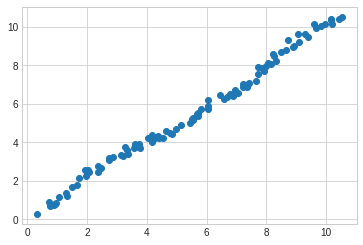

In [3]:
# np.random.rand : 0와 1사이의 균일분포에서 난수 matrix array생성
# np.random.randiant : 균일 분포의 정수 난수 1개 생성 
# np.random.randn : 가우시안 표준 정규 분포에서 난수 matrix array 생성 
noise = np.random.rand(100, 1)
X = sorted(10 * np.random.rand(100, 1)) + noise
y = sorted(10 * np.random.rand(100, 1)) + noise

plt.scatter(X, y);

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
print("선형 회귀 가중치 :", model.coef_)
print("선형 회귀 편향(bias) :", model.intercept_)

선형 회귀 가중치 : [[0.98683287]]
선형 회귀 편향(bias) : [0.07428517]


In [6]:
print("train socre :", model.score(X_train, y_train))
print("test socre :", model.score(X_test, y_test))

train socre : 0.990049209235917
test socre : 0.990498498515414


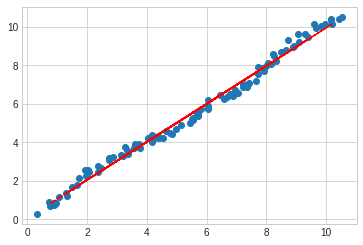

In [7]:
predict = model.predict(X_test)

plt.scatter(X, y)
plt.plot(X_test, predict, "--r");

### 보스턴 주택 가격 데이터

* 주택 가격 데이터는 도시에 대한 분석과 부동산, 경제적인 정보 분석 등 많은 활용 가능한 측면들이 존재
* 보스턴 주택 가격 데이터는 카네기 멜론 대학교에서 관리하는 StatLib 라이브러리에서 가져온 것
* 헤리슨(Harrison, D.)과 루빈펠트(Rubinfeld, D. L.)의 논문 "Hedonic prices and the demand for clean air', J. Environ. Economics & Management"에서 보스턴 데이터가 사용
* 1970년도 인구 조사에서 보스턴의 506개 조사 구역과 주택 가격에 영향을 주는 속성 21개로 구성

| 속성 | 설명 |
|------|------|
| CRIM | 자치시(town)별 1인당 범죄율 |
| ZN | 25,000 평방 피트가 넘는 거주지역 토지 비율 |
| INDUS | 자치시(town)별 비소매 상업지역 토지 비율 |
| CHAS | 찰스 강(Charles River)에 대한 변수 (강의 경계에 위치하면 1, 그렇지 않으면 0) |
| NOX | 10,000,000당  일산화질소 농도 |
| RM | 주택 1가구당 평균 방의 수 |
| AGE | 1940년 이전에 건축된 소유주택 비율 |
| DIS | 5개의 보스턴 고용 센터까지의 가중 거리 |
| RAD | 방사형 고속도로 접근성 지수 |
| TAX | 10,000 달러당 재산 세율 |
| PTRATIO | 자치시(town)별 학생/교사 비율 |
| B | 1000(Bk-0.63)^2, Bk: 자치시별 흑인 비율 |
| LSTAT | 모집단의 하위계층 비율(%) |
| MEDV | 소유자가 거주하는 주택가격(중앙값) (단위: 1,000 달러) |

In [8]:
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.keys())
print(boston.feature_names)
print(boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employ

In [9]:
import pandas as pd

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df["MEDV"] = boston.target
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


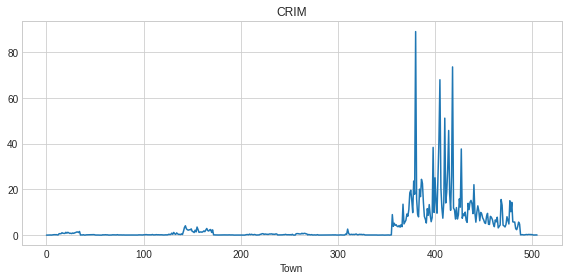

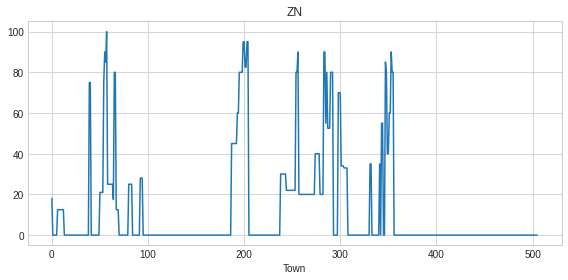

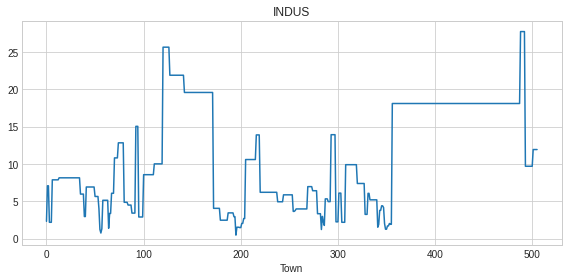

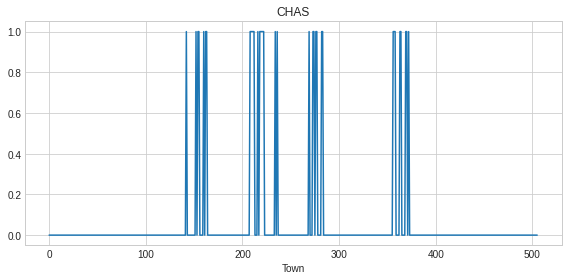

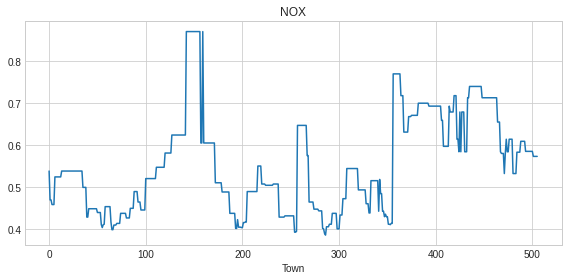

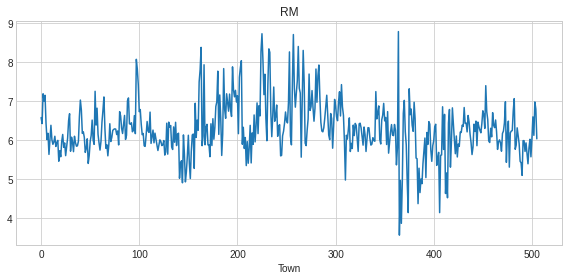

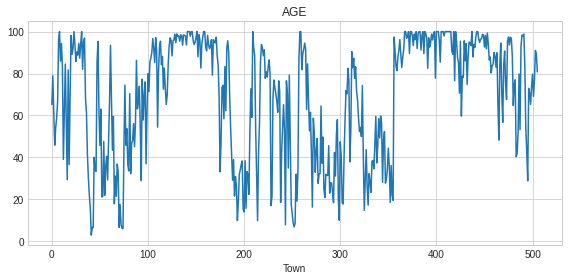

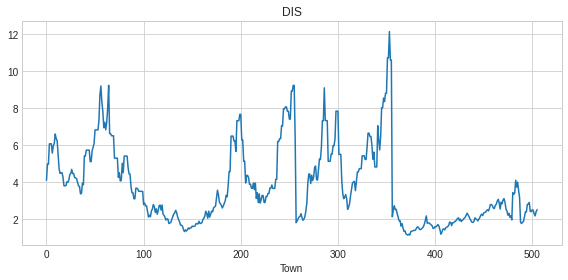

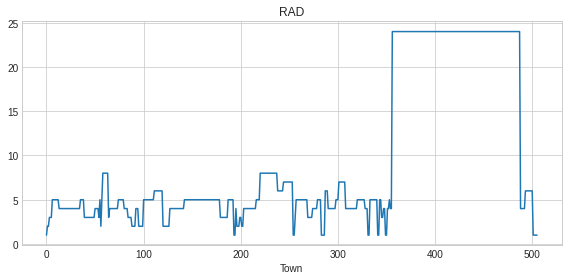

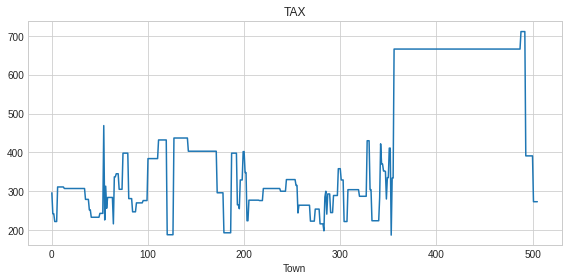

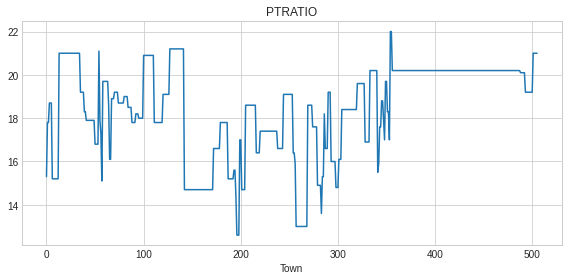

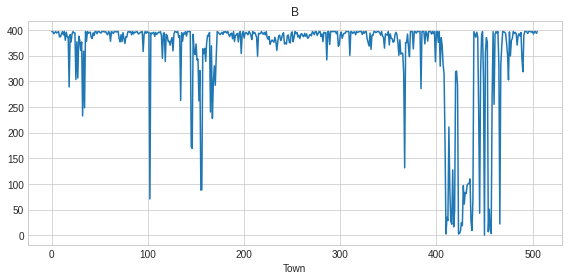

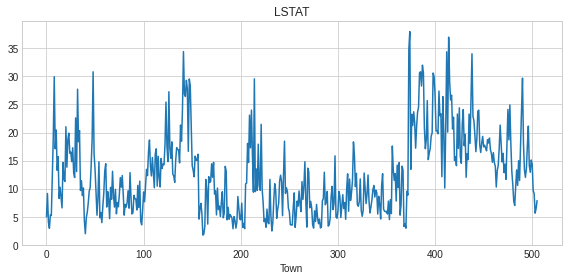

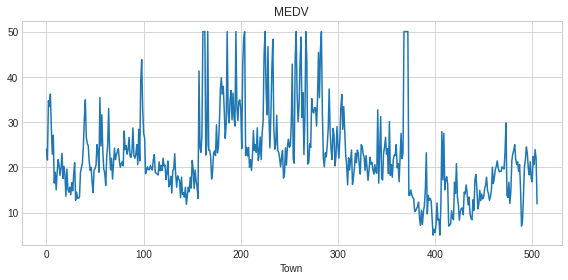

In [11]:
for i, col in enumerate(df.columns):
  plt.figure(figsize=(8,4))
  plt.plot(df[col])
  plt.title(col)
  plt.xlabel("Town")
  plt.tight_layout()

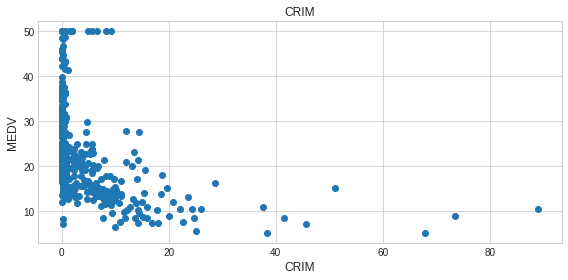

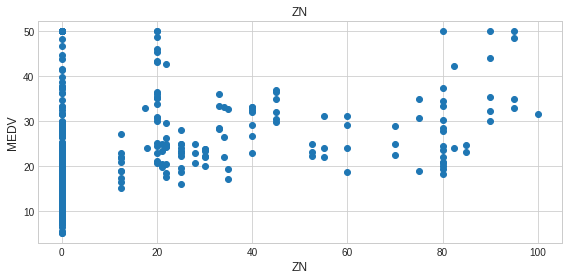

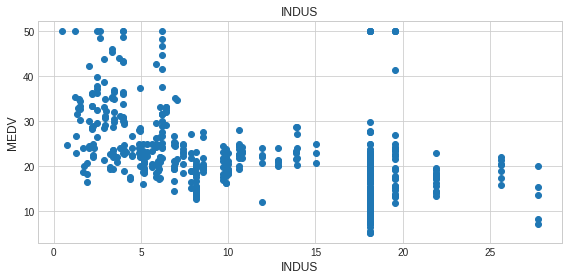

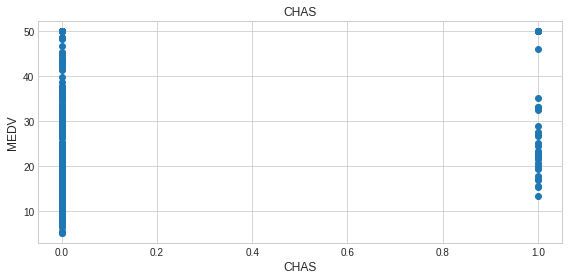

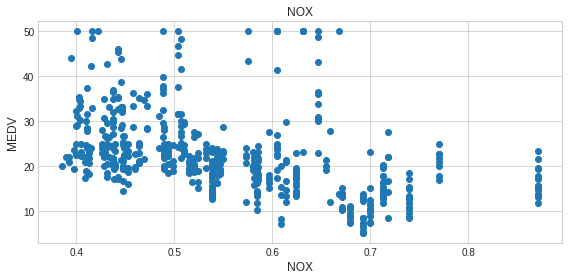

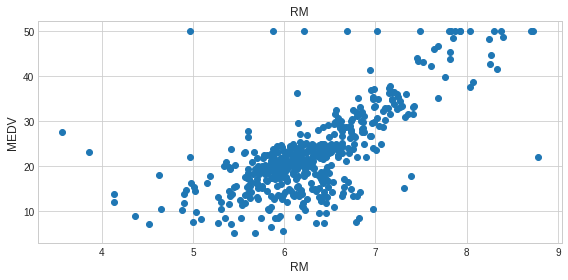

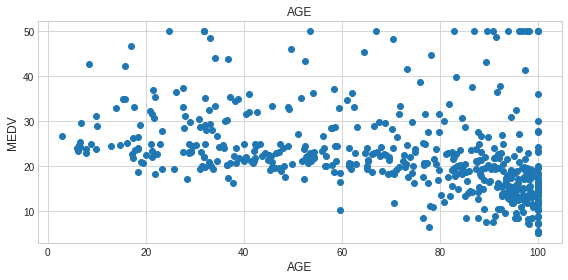

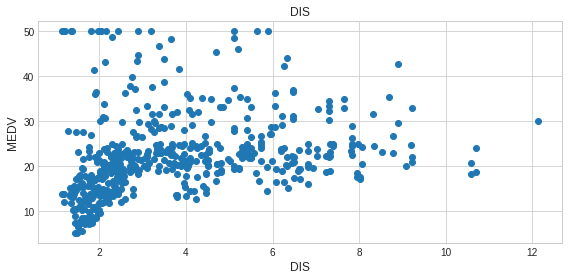

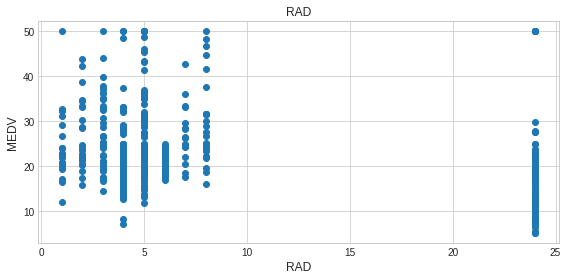

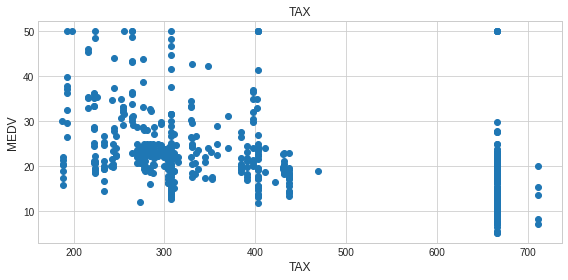

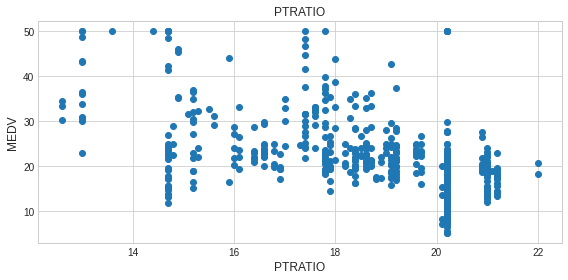

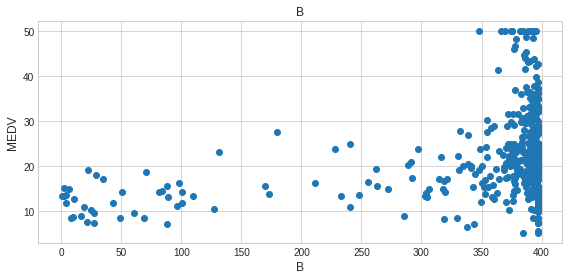

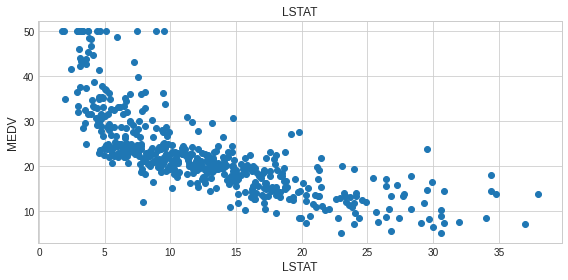

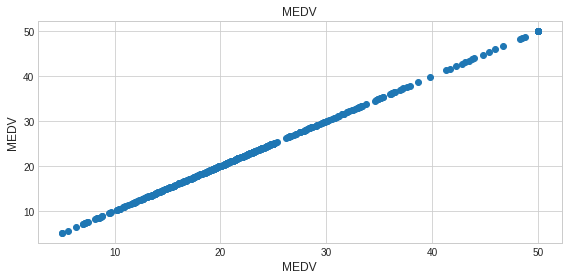

In [12]:
for i, col in enumerate(df.columns):
  plt.figure(figsize=(8,4))
  plt.scatter(df[col], df["MEDV"])
  plt.title(col)
  plt.xlabel(col, size=12)
  plt.ylabel("MEDV", size=12)
  plt.tight_layout()

In [13]:
import seaborn as sns

# sns.pairplot(df);

### 보스턴 주택 가격에 대한 선형 회귀

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(normalize=True)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [16]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7168712851718473

* 데이터를 두개로 분리하고 모델을 생성 및 검증하였지만, 데이터를 분리하였기 때문에 훈련에 사용할 수 있는 양도 작아지고, 분리가 잘 안된 경우에는 잘못된 검증이 될 수 있음
* 이럴 경우에는 테스트셋을 여러개로 구성하여 교차 검증을 진행
* `cross_val_score()` 함수는 교차 검증을 수행하여 모델을 검증
* 다음 예제에서는 모델 오류를 측정하는 점수로 NMSE(Negative Mean Squared Error)를 사용

In [17]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, boston.data, boston.target, cv=10, scoring="neg_mean_squared_error")

print("MSE score", scores)
print("MSE score mean", scores.mean())
print("MSE score std", scores.std())

MSE score [  -9.28694671  -14.15128316  -14.07360615  -35.20692433  -31.88511666
  -19.83587796   -9.94726918 -168.37537954  -33.32974507  -10.96041068]
MSE score mean -34.70525594452485
MSE score std 45.57399920030876


* 회귀모델의 검증을 위한 또 다른 측정 지표 중 하나로 결정 계수(coefficient of determination, $R^2$) 사용

In [18]:
r2_scores = cross_val_score(model, boston.data, boston.target, cv=10, scoring="r2")

print("R2 scores", r2_scores)
print("R2 scores means", r2_scores.mean())
print("R2 scores std", r2_scores.std())

R2 scores [ 0.73376082  0.4730725  -1.00631454  0.64113984  0.54766046  0.73640292
  0.37828386 -0.12922703 -0.76843243  0.4189435 ]
R2 scores means 0.20252899006056357
R2 scores std 0.5952960169512289


생성된 회귀 모델에 대해서 평가를 위해 LinearRegression 객체에 포함된 두 개의 속성 값을 통해 수식을 표현
* intercept_: 추정된 상수항
* coef_: 추정된 가중치 벡터

In [19]:
# 각각의 weights 출력하기
print("y="+str(model.intercept_))
for i, c in enumerate(model.coef_):
  print(str(c)+ " * X"+str(i))

y=33.579514776641915
-0.08060994924029641 * X0
0.03878208969207635 * X1
0.026470843544221103 * X2
3.102429143276348 * X3
-14.287304189580713 * X4
3.8141037249492618 * X5
-0.0039108621475781764 * X6
-1.2898457514568213 * X7
0.2924863678974087 * X8
-0.011898352438087699 * X9
-0.9354002993666063 * X10
0.01028490051130911 * X11
-0.5479316737651283 * X12


In [20]:
from sklearn.metrics import mean_squared_error, r2_score

predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, predict)))
r2 = r2_score(y_train, predict)

print(rmse, r2)

4.618934347053611 0.7448033642025407


In [21]:
predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, predict)))
r2 = r2_score(y_test, predict)

print(rmse, r2)

4.969715965478249 0.7168712851718473


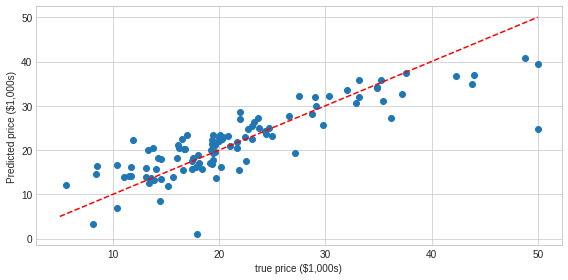

In [22]:
def plot_boston_prices(expected, predicted):
  plt.figure(figsize=(8,4))
  plt.scatter(expected, predicted)
  plt.plot([5,50], [5,50], "--r")
  plt.xlabel("true price ($1,000s)")
  plt.ylabel("Predicted price ($1,000s)")
  plt.tight_layout()

predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)

### 캘리포니아 주택 가격 데이터

| 속성 | 설명 |
|------|------|
| MedInc | 블록의 중간 소득 |
| HouseAge | 블록의 중간 주택 연도 |
| AveRooms | 자치시(town)별 비소매 상업지역 토지 비율 |
| AveBedrms | 찰스 강(Charles River)에 대한 변수 (강의 경계에 위치하면 1, 그렇지 않으면 0) |
| Population | 10,000,000당  일산화질소 농도 |
| AveOccup | 주택 1가구당 평균 방의 수 |
| Latitude | 1940년 이전에 건축된 소유주택 비율 |
| Longitude | 5개의 보스턴 고용 센터까지의 가중 거리 |

In [23]:
from sklearn.datasets import fetch_california_housing 



california.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [24]:
import pandas as pd 

df = pd.DataFrame(california.data, columns=california.feature_names)
df["Target"] = california.target

In [25]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


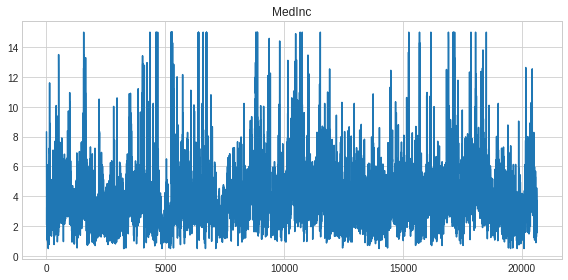

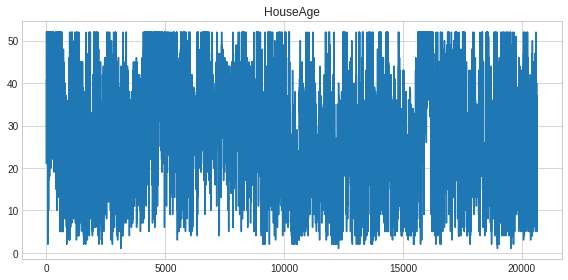

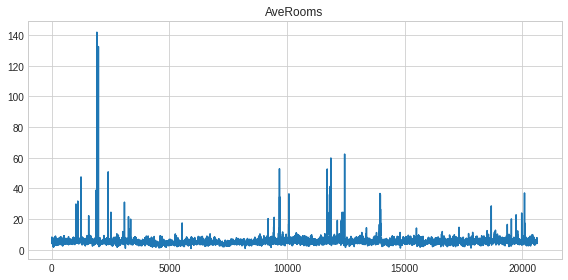

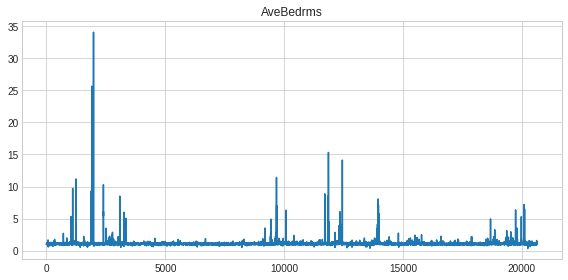

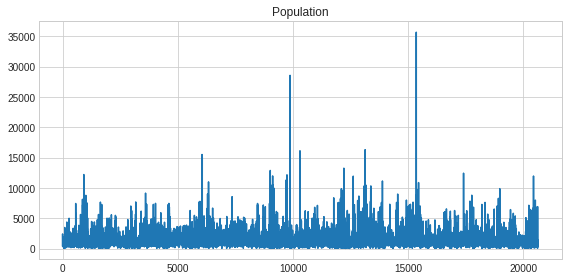

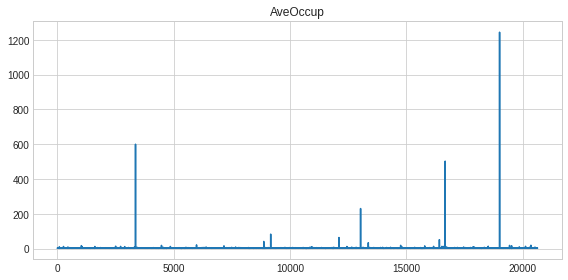

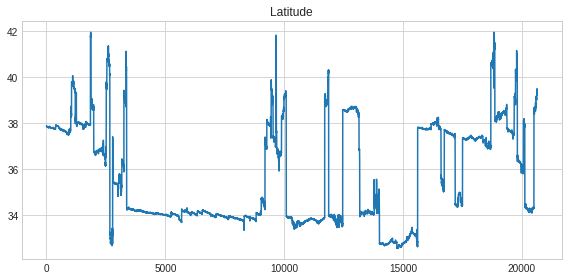

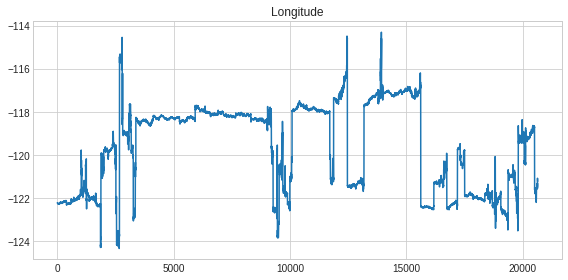

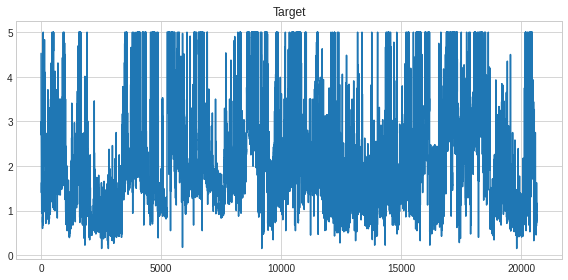

In [26]:
import matplotlib.pyplot as plt

for i, col in enumerate(df.columns):
  plt.figure(figsize=(8,4))
  plt.plot(df[col])
  plt.title(col)
  plt.tight_layout() # 삐뚤빼뚤 되는 그래프 lay_out을 정렬해주는 코드

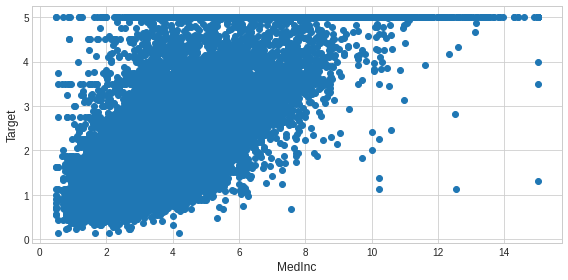

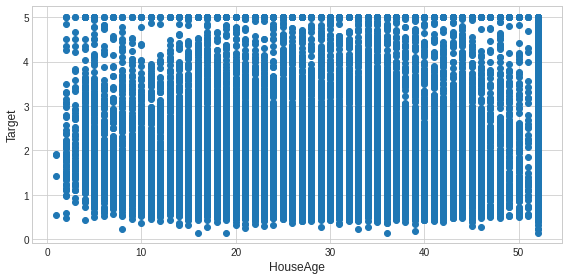

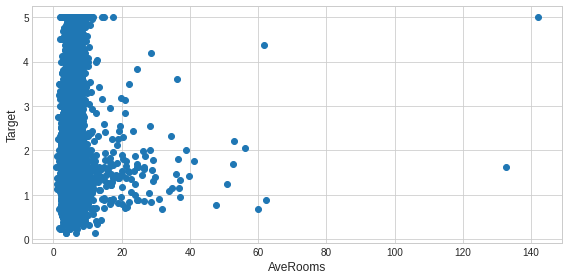

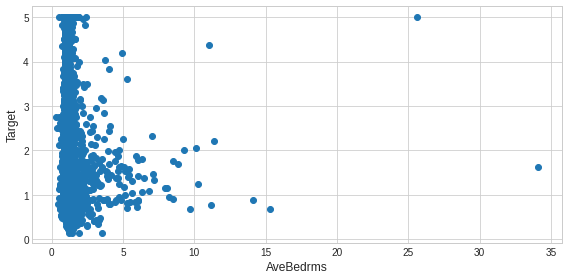

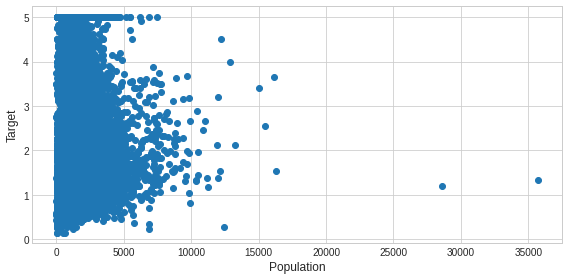

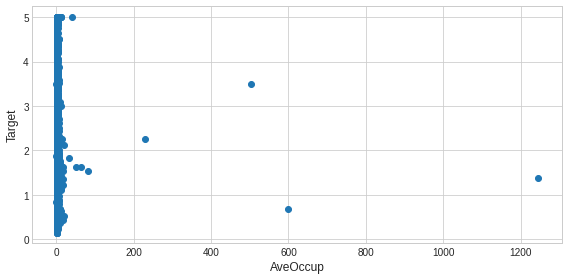

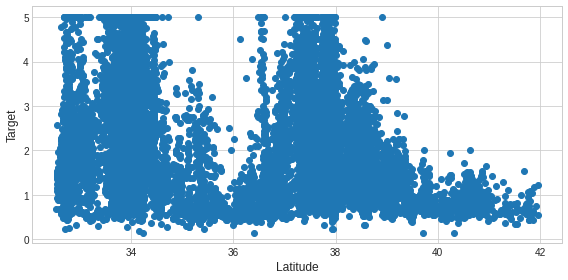

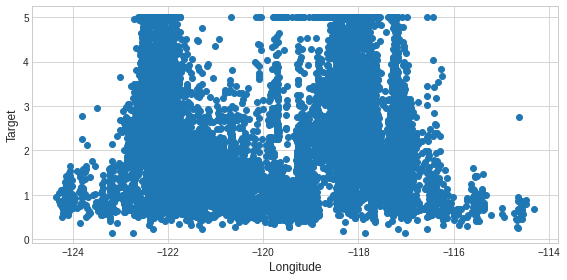

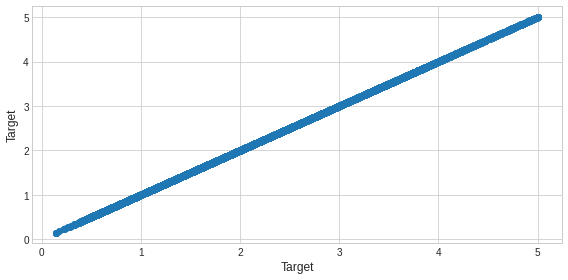

In [27]:
import matplotlib.pyplot as plt

for i, col in enumerate(df.columns):
  plt.figure(figsize=(8,4))
  plt.scatter(df[col], df["Target"])
  plt.xlabel(col, size=12)
  plt.ylabel("Target", size=12)
  plt.tight_layout() # 삐뚤빼뚤 되는 그래프 lay_out을 정렬해주는 코드

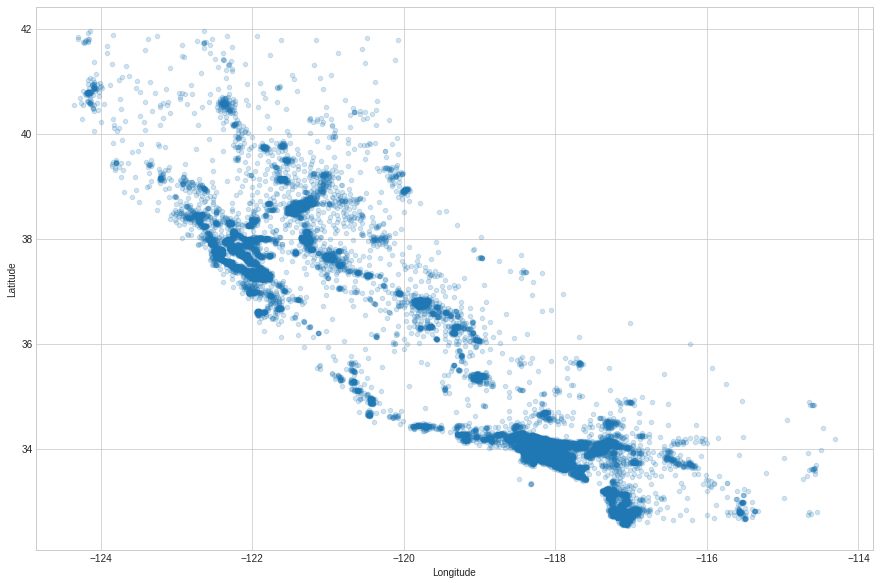

In [28]:
df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.2, figsize=(15, 10));

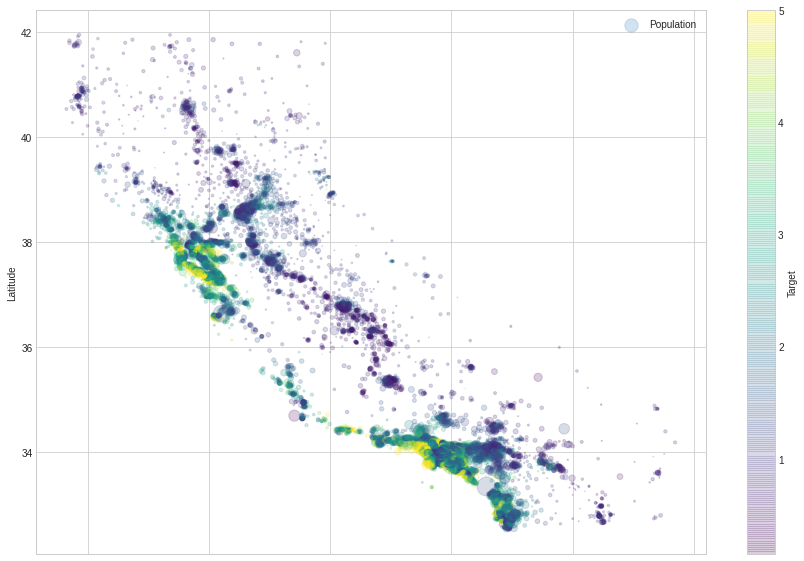

In [29]:
# 위 그림은 동일한 색상으로 보기가 어려우니 색상을 구분해도록 하겠습니다. 
df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.2, s=df["Population"]/100, 
        label="Population", c="Target", cmap=plt.get_cmap("viridis"), colorbar=True, figsize=(15, 10));

In [30]:
y = df["Target"]
X = df.drop("Target", axis=1)

In [41]:
model = LinearRegression(normalize=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

In [39]:
# model = LinearRegression(normalize=True)

# X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2)

# X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16512, 8), (16512,), (4128, 8), (4128,))

### 캘리포니아 주택 가격에 대한 선형 회귀

In [42]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [49]:
print("train :", model.score(X_train, y_train))
print("test :", model.score(X_test, y_test))

scores = cross_val_score(model, X, y, cv=10, scoring="neg_mean_squared_error")
print("score mean", scores.mean())
print("score std", scores.std())

r2_scores = cross_val_score(model, X, y, cv=10, scoring="r2")

print("r2_scores mean", r2_scores.mean())
print("r2_scores std", r2_scores.std())

train : 0.6125511913966952
test : 0.5757877060324508
score mean -0.550952429695659
score std 0.1928858295389266
r2_scores mean 0.5110068610524559
r2_scores std 0.05928861371272894


In [59]:
print("y=", str(model.intercept_))
for i, c in enumerate(model.coef_):
  print("+", str(c.round(4)), f"* X{i}")

y= -37.023277706064114
+ 0.4487 * X0
+ 0.0097 * X1
+ -0.1233 * X2
+ 0.7831 * X3
+ -0.0 * X4
+ -0.0035 * X5
+ -0.4198 * X6
+ -0.4337 * X7


In [60]:
predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, predict)))
r2 = r2_score(y_test, predict)

print("rmse : ", rmse)
print("r2 : ", r2)

rmse :  0.7455813830127763
r2 :  0.5757877060324508


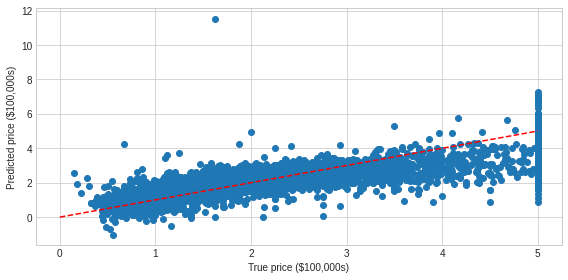

In [61]:
def plot_california_prices(expected, predicted):
  plt.figure(figsize=(8,4))
  plt.scatter(expected, predicted)
  plt.plot([0,5], [0,5], "--r")
  plt.xlabel("True price ($100,000s)")
  plt.ylabel("Predicted price ($100,000s)")
  plt.tight_layout()

predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)

## 릿지 회귀(Ridge Regression)

* 릿지 회귀는 선형 회귀를 개선한 선형 모델
* 릿지 회귀는 선형 회귀와 비슷하지만, 가중치의 절대값을 최대한 작게 만든다는 것이 다름
* 이러한 방법은 각각의 특성(feature)이 출력 값에 주는 영향을 최소한으로 만들도록 규제(regularization)를 거는 것
* 규제를 사용하면 다중공선성(multicollinearity) 문제를 방지하기 때문에 모델의 과대적합을 막을 수 있게 됨
* 다중공선성 문제는 두 특성이 일치에 가까울 정도로 관련성(상관관계)이 높을 경우 발생
* 릿지 회귀는 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음

\begin{equation}
RidgeMSE = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{p} w_i^2
\end{equation}

  + $\alpha$: 사용자가 지정하는 매개변수
  * $\alpha$가 크면 규제의 효과가 커지고, $\alpha$가 작으면 규제의 효과가 작아짐

### 보스턴 주택 가격에 대한 릿지 회귀

In [62]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [63]:
X,y = load_boston(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    random_state=42) 

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [68]:
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [69]:
print("train score : ", model.score(X_train, y_train))
print("test score : ", model.score(X_test, y_test))

train score 0.750827350977196
test score 0.6686244122021411


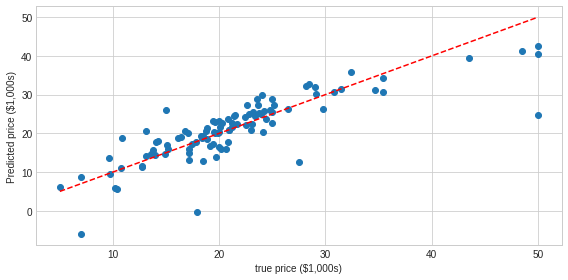

In [71]:
predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)

* 릿지 회귀는 가중치에 제약을 두기 때문에 선형 회귀 모델보다 훈련 데이터 점수가 낮을 수 있음
* 일반화 성능은 릿지 회귀가 더 높기 때문에 평가 데이터 점수는 릿지 회귀가 더 좋음

* 일반화 성능에 영향을 주는 매개 변수인 $\alpha$ 값을 조정해 보면서 릿지 회귀 분석의 성능이 어떻게 변하는지 확인 필요

### 캘리포니아 주택 가격에 대한 릿지 회귀

In [72]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(california.data, 
                                                    california.target, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [75]:
model = Ridge(alpha=0.05)
model.fit(X_train, y_train)

Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [76]:
print("train score : ", model.score(X_train, y_train))
print("test score : ", model.score(X_test, y_test))

train score :  0.6125511912288361
test score :  0.5757910813615548


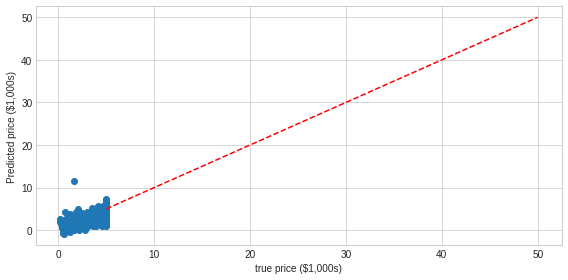

In [77]:
predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)

## 라쏘 회귀(Lasso Regression)

* 선형 회귀에 규제를 적용한 또 다른 모델로 라쏘 회귀가 있음
* 라쏘 회귀는 릿지 회귀와 비슷하게 가중치를 0에 가깝게 만들지만, 조금 다른 방식을 사용

* 라쏘 회귀에서는 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음

\begin{equation}
LassoMSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{p} |w_i|
\end{equation}

* 라쏘 회귀도 매개변수인 $\alpha$ 값을 통해 규제의 강도 조절 가능

### 보스턴 주택 가격에 대한 라쏘 회귀

In [82]:
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [81]:
X, y = load_boston(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Lasso(0.05)
model.fit(X_train, y_train)
print("train score : ", model.score(X_train, y_train))
print("test score : ", model.score(X_test, y_test))

train score :  0.740456983910484
test score :  0.6570248454523948


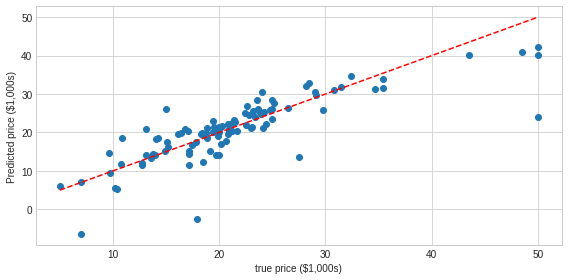

In [83]:
predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)

### 캘리포니아 주택 가격에 대한 라쏘 회귀

In [84]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(california.data, 
                                                    california.target, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [85]:
model = Lasso(alpha=0.05)
model.fit(X_train, y_train)

Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [86]:
print("train score : ", model.score(X_train, y_train))
print("test score : ", model.score(X_test, y_test))

train score :  0.585938402760683
test score :  0.5691224100229201


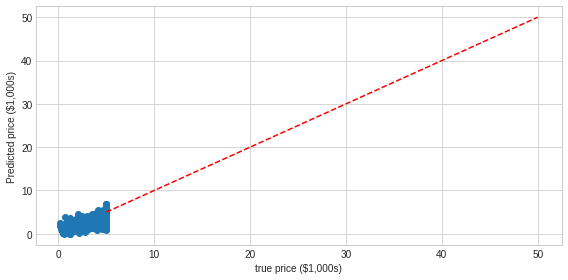

In [87]:
predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)

## 신축망 (Elastic-Net)

* 신축망은 릿지 회귀와 라쏘 회귀, 두 모델의 모든 규제를 사용하는 선형 모델
* 두 모델의 장점을 모두 갖고 있기 때문에 좋은 성능을 보임
* 데이터 특성이 많거나 서로 상관 관계가 높은 특성이 존재 할 때 위의 두 모델보다 좋은 성능을 보여 줌

* 신축망은 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음

\begin{equation}
ElasticMSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i) + \alpha \rho \sum_{i=1}^{p} |w_i| + \alpha (1 - \rho) \sum_{i=1}^{p} w_i^2
\end{equation}

  + $\alpha$: 규제의 강도를 조절하는 매개변수
  + $\rho$: 라쏘 규제와 릿지 규제 사이의 가중치를 조절하는 매개변수

### 보스턴 주택 가격에 대한 신축망

In [88]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [92]:
X, y= load_boston(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = ElasticNet(alpha=0.01, l1_ratio=0.5)

model.fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score:", model.score(X_test, y_test))

train score: 0.7462746356006393
test score: 0.6639495017480362


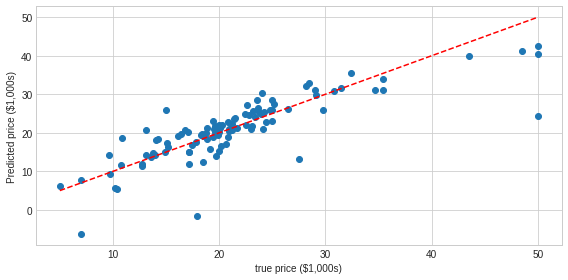

In [93]:
predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)

### 캘리포니아 주택 가격에 대한 신축망

In [100]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(california.data, 
                                                    california.target, 
                                                    test_size=0.2, 
                                                    random_state=42)

model = ElasticNet(alpha=0.1, l1_ratio=0.5)

model.fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score:", model.score(X_test, y_test))


train score: 0.5794133168599884
test score: 0.5626560643897963


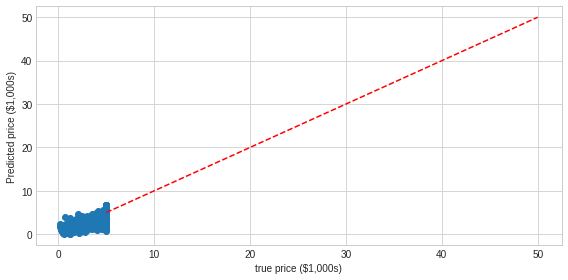

In [101]:
predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)

## 직교 정합 추구 (Orthogonal Matching Pursuit)

* 직교 정합 추구 방법은 모델에 존재하는 가중치 벡터에 특별한 제약을 거는 방법

* 직교 정합 추구 방법은 다음을 만족하는 파라미터 $w$를 찾는것이 목표

\begin{equation}
\underset{w}{\arg \min} \; ||y - \hat{y}||^2_2 \; subject \; to \; ||w||_0 \leq k
\end{equation}

  + $||w||_0$: 가중치 벡터 $w$에서 0이 아닌 값의 개수

* 직교 정합 추구 방법은 가중치 벡터 $w$에서 0이 아닌 값이 $k$개 이하가 되도록 훈련됨
* 이러한 방법은 모델이 필요 없는 데이터 특성을 훈련 과정에서 자동으로 제거 하도록 만들 수 있음

### 보스턴 주택 가격에 대한 직교 정합 추구

In [104]:
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [108]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=123)

model = OrthogonalMatchingPursuit(n_nonzero_coefs=7)
model.fit(X_train, y_train)

print("train score:", model.score(X_train, y_train))
print("test score:", model.score(X_test, y_test))

train score: 0.7528041735893081
test score: 0.6132892116913782


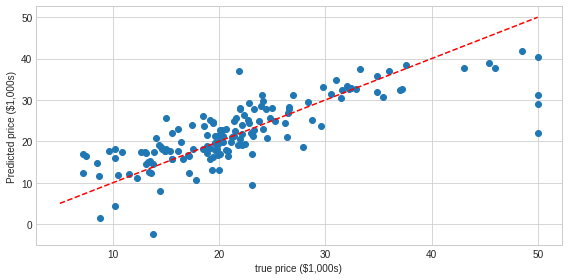

In [109]:
predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)

* 직교 정합 추구 방법은 위에서 설명한 제약 조건 대신에 다음 조건을 만족하도록 변경 가능

\begin{equation}
\underset{w}{\arg \min} \; ||w||_0 \; subject \; to \; ||y - \hat{y}||^2_2 \leq tol
\end{equation}

  + $||y - \hat{y}||^2_2$는 $\sum_{i=1}^N (y - \hat{y})^2$와 같은 의미

* 위의 식을 통해서 직교 정합 추구 방법을 $y$와 $\hat{y}$ 사이의 오차 제곱 합을 $tol$ 이하로 하면서 $||w||_0$를 최소로 하는 모델로 대체 가능

In [110]:
model = OrthogonalMatchingPursuit(tol=1.0)

model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_omp.py:673: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  return_n_iter=True)


OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
                          normalize=True, precompute='auto', tol=1.0)

In [111]:
print("train score:", model.score(X_train, y_train))
print("test score:", model.score(X_test, y_test))

train score: 0.7647156501433012
test score: 0.6485645742370694


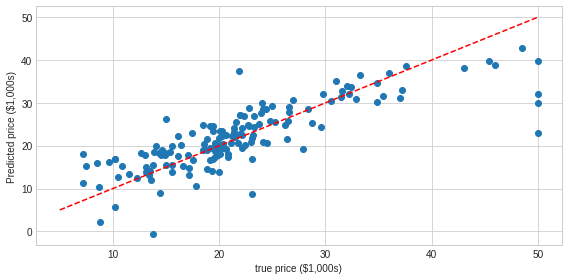

In [112]:
predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)

### 캘리포니아 주택 가격에 대한 직교 정합 추구

In [ ]:
# 생략 

## 다항 회귀 (Polynomial Regression)

* 입력 데이터를 비선형 변환 후 사용하는 방법
* 모델 자체는 선형 모델

\begin{equation}
\hat{y} = w_1 x_1 + w_2 x_2 + w_3 x_3 + w_4 x_1^2 + w_5 x_2^2
\end{equation}

* 차수가 높아질수록 더 복잡한 데이터 학습 가능

![polynomial regression](https://scikit-learn.org/stable/_images/sphx_glr_plot_polynomial_interpolation_0011.png)


### 보스턴 주택 가격에 대한 다항 회귀

In [135]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

In [136]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

pipe = make_pipeline(
    PolynomialFeatures(degree=2),
    StandardScaler(),
    LinearRegression()
)

pipe.fit(X_train, y_train)

print("train score:", pipe.score(X_train, y_train))
print("test score:", pipe.score(X_test, y_test))

train score: 0.9345924309356554
test score: 0.8248574882000326


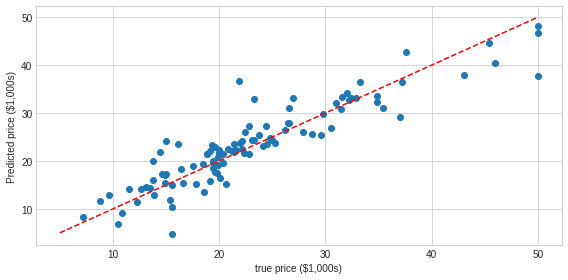

In [137]:
predicted = pipe.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)

### 캘리포니아 주택 가격에 대한 다항 회귀

In [138]:
california = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(california.data, 
                                                    california.target, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [145]:
pipe = make_pipeline(
    PolynomialFeatures(degree=2),
    StandardScaler(),
    LinearRegression()
)

pipe.fit(X_train, y_train)

print("train score:", pipe.score(X_train, y_train))
print("test score:", pipe.score(X_test, y_test))

train score: 0.6852681982344956
test score: 0.6456819729261893


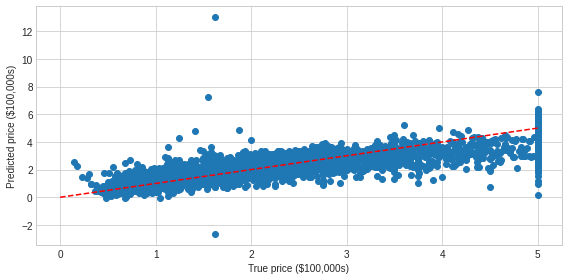

In [146]:
predicted = pipe.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)

## 참고문헌

* scikit-learn 사이트: https://scikit-learn.org/
* Jake VanderPlas, "Python Data Science Handbook", O'Reilly
* Sebastian Raschka, Vahid Mirjalili, "Python Machine Learning", Packt
* Giuseppe Bonaccorso, "Machine Learning Algorithm", Packt
* Aurelien Geron, "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems", O'Reilly